# Introduction
`matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python.

<img src='https://matplotlib.org/_images/sphx_glr_scatter_demo2_0011.png'>

[Matplotlib Gallery](https://matplotlib.org/gallery/index.html)

# Imports

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Visulisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime
from datetime import datetime


In [2]:
mpl.__version__

'3.3.2'

In [3]:
mpl?

In [4]:
mpl??

# Paths & Variable Initialisations

In [5]:
plt.style.use('ggplot')

# Basics

In [6]:
x = np.linspace(0, 10, 100)
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

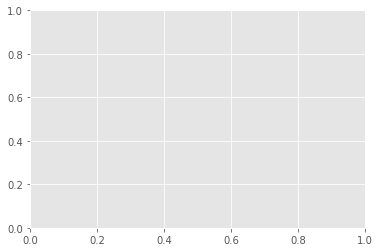

In [7]:
plt.subplots()

Matplotlib is a highly object oriented, on a broad level it has two major objects :-

- Figure : Think of a `figure` as a blank canvas on which you would draw.
- Axes : Think of `axes` as the tools that you would draw with

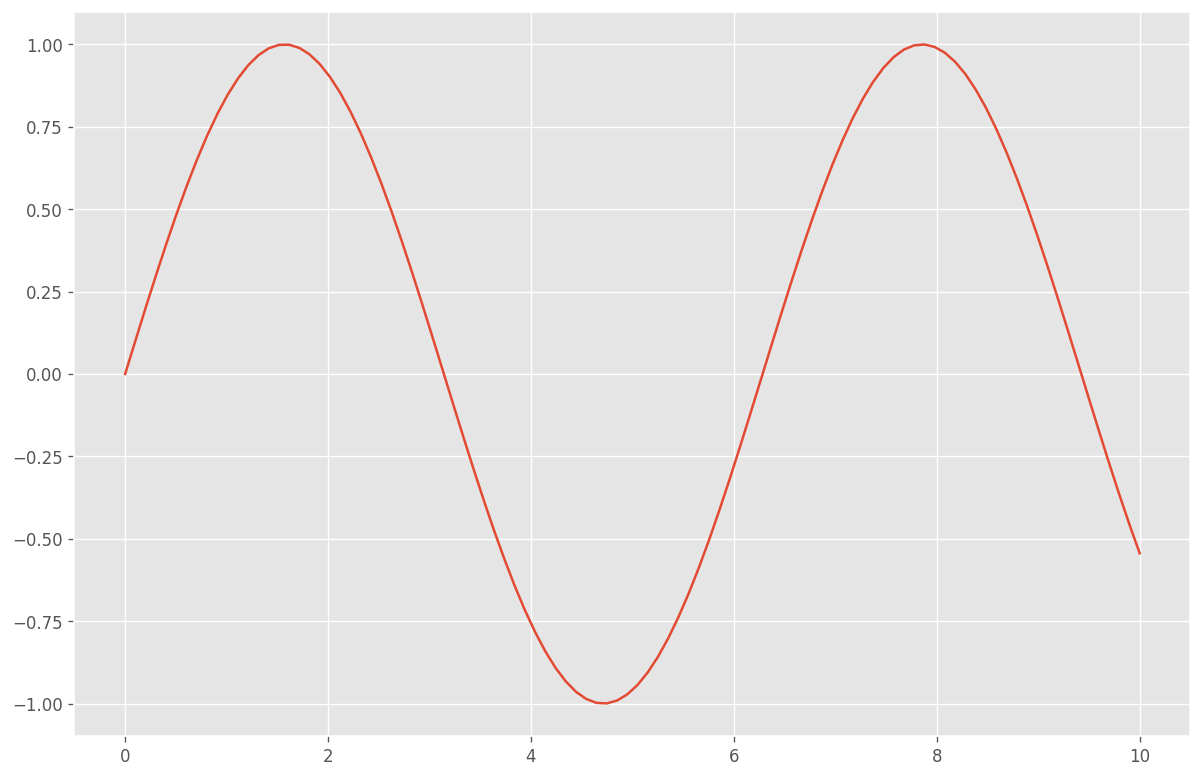

In [7]:
sines = np.sin(x)
cosines=np.cos(x)
fig=plt.figure(figsize=(12,8), dpi=120)
plt.plot(x, sines, '-')

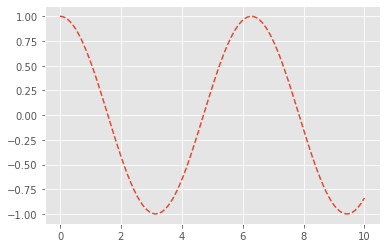

In [8]:
plt.plot(x, cosines, '--')

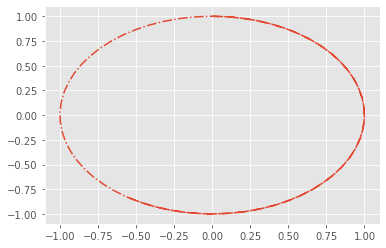

In [9]:
fig=plt.figure()
plt.plot(sines, cosines, '-.')

<b>Saving a plot</b>

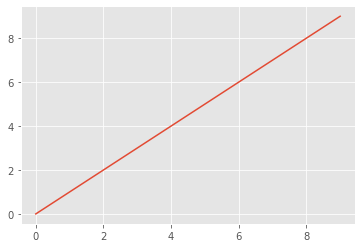

In [10]:
plt.plot(np.arange(10), np.arange(10))

In [11]:
fig.savefig('sine_cosine.png')

<b>Multiple Plots</b>

Text(0.5, 0.98, 'Sine / Cosine')

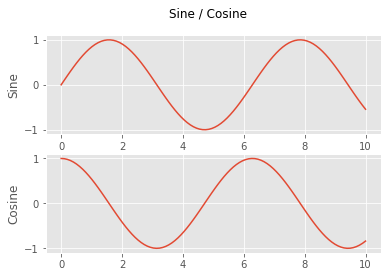

In [11]:
fig, axes = plt.subplots(2)
axes[0].plot(x, sines)
axes[0].set_ylabel('Sine')

axes[1].plot(x, cosines)
axes[1].set_ylabel('Cosine')

fig.suptitle('Sine / Cosine')

# Simple Line Plot

<b>Generating Random Data</b>

In [12]:
def gen_data(shape=200, init_offset=100, multiplier = 1e3):
    _data = [np.random.randn()+init_offset]
    for _ in range(shape):
        _data.append(np.random.randn()+_data[-1])
    return np.array(_data)*multiplier


<b>Creating a Time Series</b>

In [13]:
sdata = gen_data()
sindex = pd.period_range(datetime.now(), freq='B', periods=sdata.shape[0])
sts_data = pd.Series(data=sdata, index=sindex)
sts_data.head()

2020-12-07    100826.632559
2020-12-08    102127.007420
2020-12-09    102615.294280
2020-12-10    104740.430723
2020-12-11    103323.273994
Freq: B, dtype: float64

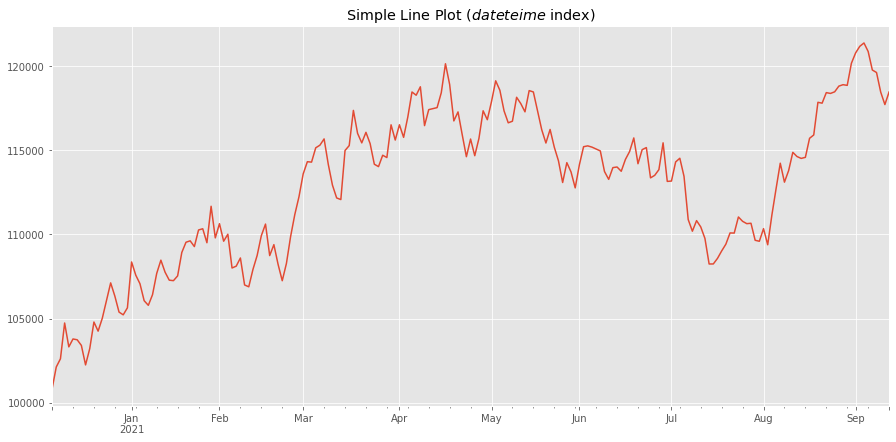

In [14]:
_=sts_data.plot(figsize=(15,7),
                title='Simple Line Plot ($dateteime$ index)')

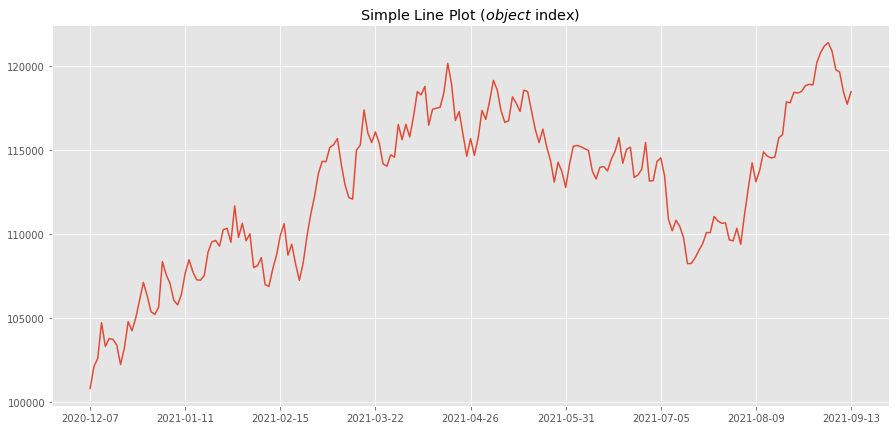

In [15]:
sts_data.index = sts_data.index.astype('str')
_=sts_data.plot(figsize=(15,7),
                title='Simple Line Plot ($object$ index)')

<b>Lets say the plot was describing a price of a commodiity in Indian Market, can we make this plot look a little better?</b>

- Add Rupee Symbol to the yticks
- Proper formatting of the datetime in the x-axis
- Add a marker to the actual datapoints to highlight there presence
- Add a legened to the plot
- Add title to the plot

In [16]:
sts_data.index = pd.to_datetime(sts_data.index)
sts_data.index.freq = pd.infer_freq(sts_data.index)
sts_data.name = 'Gold Prices'
sts_data.index

DatetimeIndex(['2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18',
               ...
               '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03',
               '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09',
               '2021-09-10', '2021-09-13'],
              dtype='datetime64[ns]', length=201, freq='B')

<b>Difference between plotting with `pandas` and `matplotlib`</b>

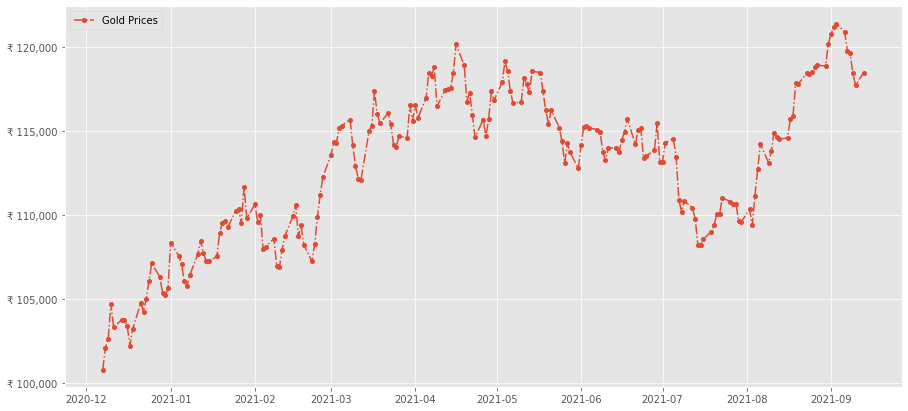

In [18]:
fig, axes =plt.subplots(figsize=(15,7))

 # Similar method - FuncFormatter
fmt = '₹ {x:,.0f}'
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(fmt))

# Plot
_=axes.plot(sts_data, linestyle='-.', # Change linestyle
            label=sts_data.name, # Add label
            marker='o', markersize=4, # Add marker size
            )
_=axes.legend() # Add Legend


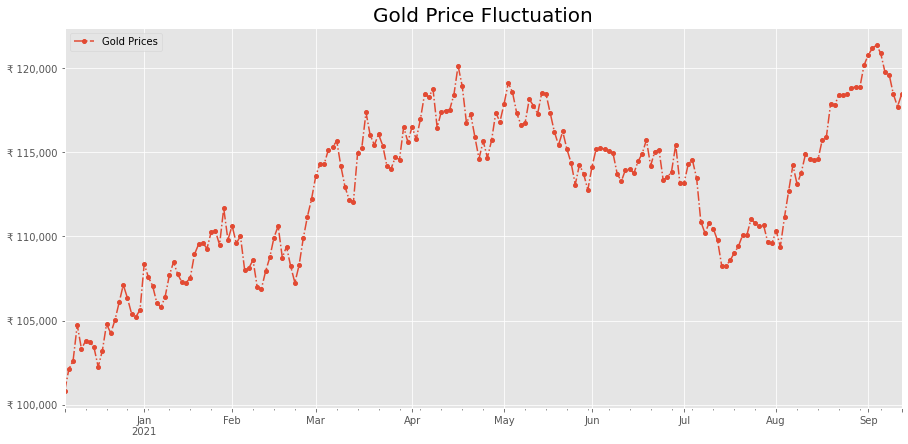

In [19]:
_=sts_data.plot(figsize=(15,7), legend=True, 
                linestyle='-.',
                marker='o', markersize=4, # Add marker size
                )
_=plt.title('Gold Price Fluctuation', fontsize=20)
# y-tick format
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(fmt))


<b>Plotting Multiple Line Plots</b>

In [20]:
sdata1 = gen_data()
sdata2 = gen_data()
sindex = pd.period_range(datetime.now(), freq='B', periods=sdata.shape[0])
stdf_data = pd.DataFrame(data=np.c_[sdata, sdata2], # What have i done just here??
                         columns= ['Gold Prices', 'Silver Prices'],
                         index=sindex)
stdf_data.head()

,Gold Prices,Silver Prices
2020-12-07,100826.632559,100447.431116
2020-12-08,102127.007420,100372.063696
2020-12-09,102615.294280,101568.274235
2020-12-10,104740.430723,102957.676951
2020-12-11,103323.273994,103665.073433


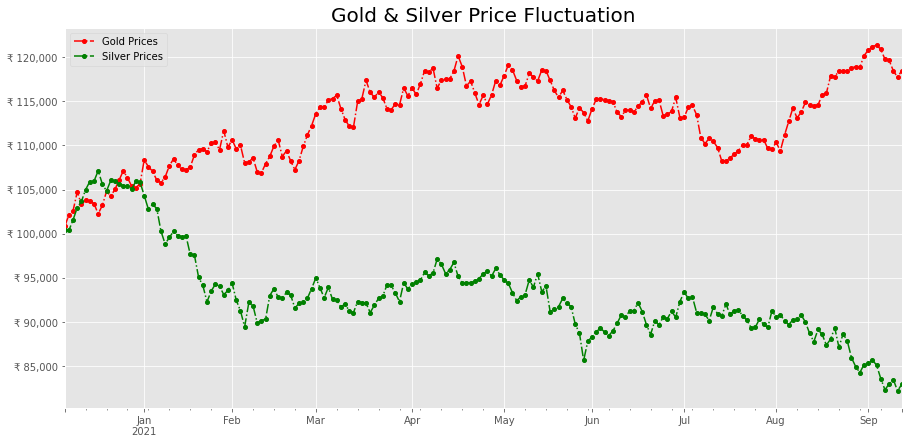

In [21]:
# y-tick format
_=stdf_data.plot(figsize=(15,7), legend=True, 
                 linestyle='-.', color=['r','g'],
                 marker='o', markersize=4, # Add marker size
                 )

_=plt.title('Gold & Silver Price Fluctuation', fontsize=20)
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(fmt))


<b>Multi-line plots on dual axis</b>

TypeError: float() argument must be a string or a number, not 'Period'

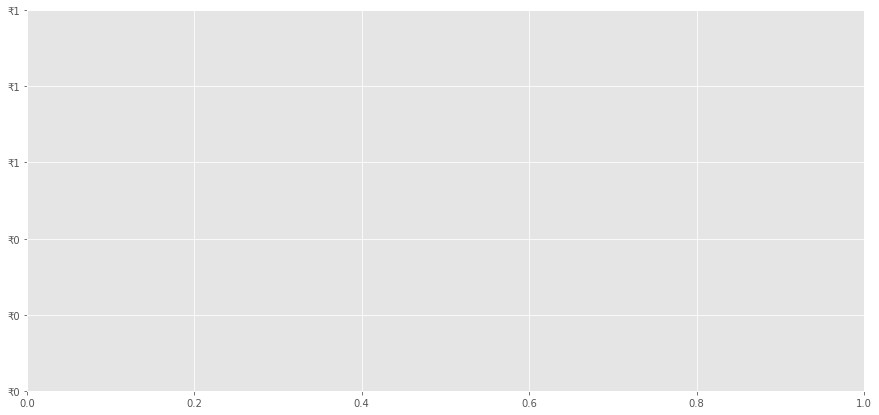

In [22]:
fig, axes =plt.subplots(figsize=(15,7))

# y-tick format
fmt = '₹{x:,.0f}'
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(fmt))

# Plot
data1 = stdf_data.iloc[:,0].copy()
_=axes.plot(data1, linestyle='-.', # Change linestyle
            label=data1.name, # Add label
            marker='o', markersize=4, # Add marker size
            )
_=axes.legend() # Add Legend

# Spawn a new axes which shared the x-axis
data2 = stdf_data.iloc[:,1].copy()
axes_dual = axes.twinx()
_=axes_dual.plot(data2, linestyle='-.', # Change linestyle
            label=data2.name, # Add label
            marker='o', markersize=4, # Add marker size
            )
_=axes_dual.legend() # Add Legend

plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(fmt))


Throws an Error! Why? Because `PeriodIndex` is not an object type understood by matplotlib

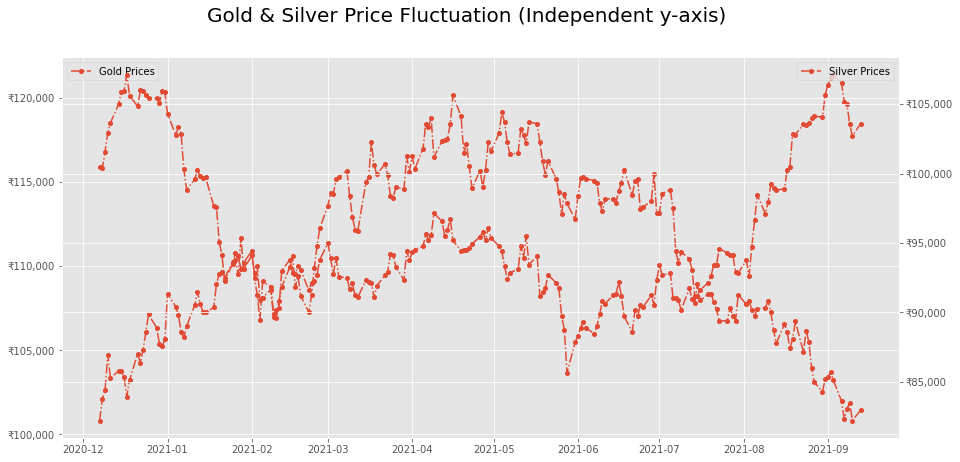

In [23]:
fig, axes =plt.subplots(figsize=(15,7))

# y-tick format
fmt = '₹{x:,.0f}'
axes.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(fmt))

# Plot
data1 = stdf_data.iloc[:,0].copy()
data1.index = data1.index.to_timestamp()
_=axes.plot(data1, linestyle='-.', # Change linestyle
            label=data1.name, # Add label
            marker='o', markersize=4, # Add marker size
            )
_=axes.legend() # Add Legend

# Spawn a new axes which shared the x-axis
data2 = stdf_data.iloc[:,1].copy()
data2.index = data2.index.to_timestamp()
axes_dual = axes.twinx()
_=axes_dual.plot(data2, linestyle='-.', # Change linestyle
            label=data2.name, # Add label
            marker='o', markersize=4, # Add marker size
            )
_=axes_dual.legend() # Add Legend


_=fig.suptitle('Gold & Silver Price Fluctuation (Independent y-axis)', fontsize=20) # Why not title?

plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(fmt))




See what happens when you give `_=axes.set_title('Axes Title', fontsize=20)` command just after `_=fig.suptitle('Go....`

# Simple Scatter Plots

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
irisDF = pd.DataFrame(iris.data , columns=iris.feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
targetcol_mapping = {k:v for k,v in enumerate(iris.target_names)}
targetcol_mapping

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [32]:
irisDF.target.map(targetcol_mapping)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [33]:
irisDF.target = irisDF.target.map(targetcol_mapping)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


No handles with labels found to put in legend.


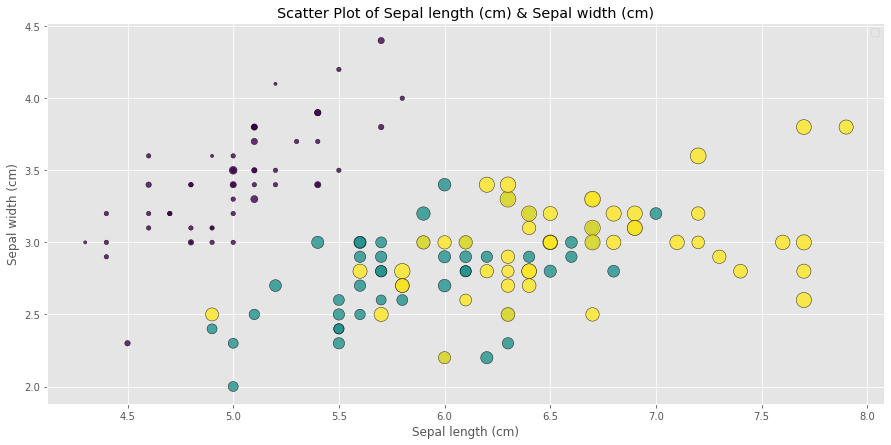

In [34]:
fig, axes =plt.subplots(figsize=(15,7))
axes.scatter(irisDF.iloc[:,0], irisDF.iloc[:,1],
             alpha=0.8, s=100*irisDF.iloc[:,3], c=iris.target,
             cmap='viridis', edgecolors='k')

axes.set_title(f'Scatter Plot of {irisDF.columns[0].capitalize()} & {irisDF.columns[1].capitalize()}')
axes.set_xlabel(irisDF.columns[0].capitalize())
axes.set_ylabel(irisDF.columns[1].capitalize())
axes.legend() # No easy way to do that... not in matplotlin -> Here comes seaborn

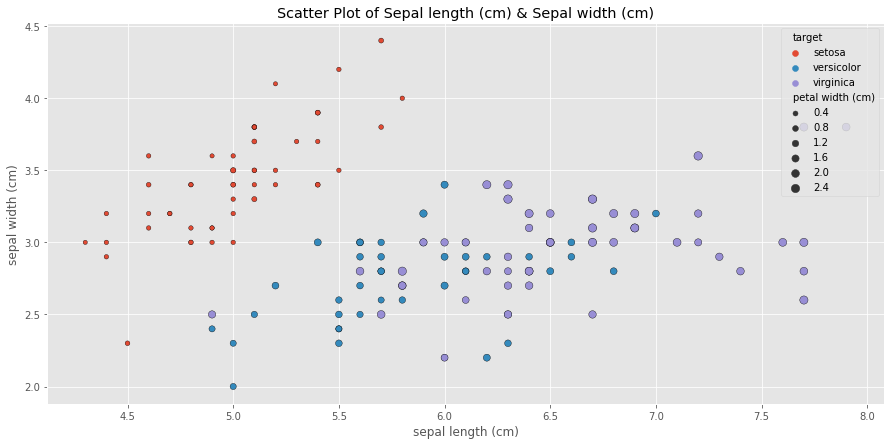

In [35]:
fig=plt.figure(figsize=(15,7))
_=sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = irisDF,
                  size = 'petal width (cm)', hue='target', edgecolor='k')
_=plt.title(f'Scatter Plot of {irisDF.columns[0].capitalize()} & {irisDF.columns[1].capitalize()}')



# Distribution Plot 

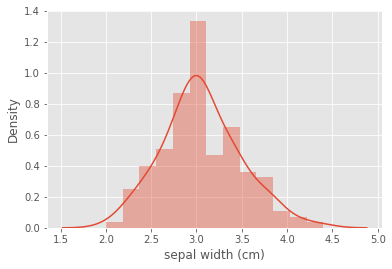

In [74]:
from warnings import filterwarnings
filterwarnings('ignore')
_=sns.distplot(irisDF.iloc[:,1])

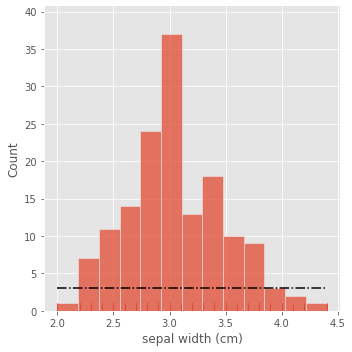

In [36]:
sns.displot(irisDF.iloc[:,1], rug=True)
plt.hlines(irisDF.iloc[:,1].mean(), irisDF.iloc[:,1].min(), irisDF.iloc[:,1].max(),
           color='k', linestyles='-.')

# Joint Plot

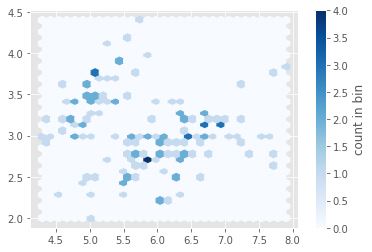

In [37]:
plt.hexbin(x=irisDF.iloc[:,0], y=irisDF.iloc[:,1], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

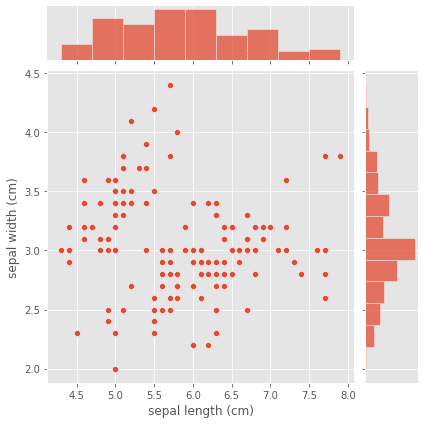

In [79]:
sns.jointplot(x=iris.feature_names[0], y=iris.feature_names[1],
              data=irisDF, kind='scatter')

# Random Testing Space